# Redes Neuronales Artificiales

### Julián D. Arias Londoño

Profesor Asociado  
Departamento de Ingeniería de Sistemas  
Universidad de Antioquia, Medellín, Colombia  
julian.ariasl@udea.edu.co

Una de las principales razones que inspiró la aparición de las redes neuronales artificiales (en inglés Artificial Neural Networks - ANN), es el hecho de que las tareas cognitivas complejas realizadas por el ser humano, requieren un nivel de paralelismo el cual es llevado a cabo a través de una compleja red de neuronas interconectadas.

![alt text](./Images/NN.png "Neuronas")

Algunas estadísticas interesantes que nos ayudan a entender el poder de la red de neuronas en el ser humano:
<li>Se estima que el cerebro humano contiene una densa red de neuronas interconectadas de alrededor de $10^{11}$ neuronas.  </li>
<li>Cada neurona se conecta en promedio con otras $10^{4}$ neuronas.</li>
<li>La actividad de las neuronas es típicamente exitada o inhibida a través de las conexiones con otras neuronas.</li>
<li>La velocidad de cambio de estado de una neurona en el mejor de los casos es del orden de $10^{−3}$ seg. Comparado con los computadores actuales es estramadamente lento. Sin embargo los humanos pueden tomar decisiones sorprendentemente complejas en muy poco tiempo. Por ejemplo Ud requiere aproximadamente $10^{−1}$ segs reconocer visualmente a su madre.</li>

## El perceptrón

Uno de los tipos más usados de RNA está basado en una unidad llamada Perceptrón. Un perceptrón toma un vector de valores reales como entrada, calcula una combinación lineal de dichas entradas y produce una salida 1 si el resultado es mayor a algún umbral y -1 en otro caso.

![alt text](./Images/Perceptron01.jpg "Neuronas")

Si observamos con detenimiento, el perceptrón es equivalente a la regresión logística vista en las primeras clases del curso. El umbral que determina si la salida es 1 o -1 es igual al negativo del término independiente en la regresión logística. Formalmente, dada una muestra ${\bf{x}} =  \left\lbrace x_1, x_2,..., x_d \right\rbrace \;\;$,              la salida $O({\bf{x}}) = O(x_1,x_2,...,x_d) \;\;\;\;\;$     computada por el perceptrón es:

$$O(x_1,x_2,...,x_d) = \left\{
                \begin{array}{ll}
                  1\;\;\;{\rm{si}}\;\;\;w_0  + w_1 x_1  + w_2 x_2  +  \cdots  + w_d x_d  > 0\\
                  - 1\;\;{\rm{\text{en otro caso}}}
                \end{array}
              \right. $$

donde $w_i$ es una constante real o peso que determina la contribución de la entrada $x_i$ a la salida del perceptrón.
<b>Note</b> que $−w_ 0$ es el umbral que la combinación sopesada de entradas $w_1x_1 + w_2x_2 + \cdots + w_d x_d \;\;\;\;$ debe sobrepasar para que la salida del perceptrón sea 1.

Una forma alternativa de pensar el perceptrón, y que para nosotros es familiar, es asumir que existe una entrada adicional con valor constante 1, $x_0 = 1$, de tal forma que la inecuación anterior se puede escribir como:

$$\sum_{i=0}^{d} w_ix_i > 0$$

o en forma matricial, simplemente ${\bf{w}}^T{\bf{x}} > 0$. La determinación del valor a la salida del perceptrón se representa normalmente como la función signo (<i>sgn</i>), entonces la función de salida del perceptrón se puede reescribir como:

$$O({\bf{x}}) = sgn({\bf{w}}^T{\bf{x}})$$

donde

$$sgn(u) = \left\{
                \begin{array}{ll}
                  1\;\;\;{\rm{si}}\;\;\;u  > 0\\
                  - 1\;\;{\rm{\text{en otro caso}}}
                \end{array}
              \right. $$


El perceptrón puede se visto como la representación de una superficie de decisión en el espacio $d$-dimensional en el cual se ubican las muestras. El perceptrón asigna valores 1 para las muestras (puntos) que se ubican a un lado del hiperplano y −1 para las que se ubican al otro lado.

![alt text](./Images/Perceptron2.png "Neuronas")

## Entrenamiento del perceptrón

Una forma de entrenar un vector de pesos es comenzar con pesos aleatorios, aplicar iterativamente el perceptrón a cada muestra de entrenamiento modificando los pesos cada vez que una muestra sea mal clasificada y repitiendo el procedimiento tantas veces como sea posible hasta que todas las muestras sean bien clasificadas. Es decir aplicar la regla:

$$w_i \leftarrow w_i + \Delta w_i$$

donde

$$\Delta w_i = \eta (y_j - O({\bf{x}}_j))x _{ji}$$

donde $y_j$ es la salida deceseada para la muestra ${\bf{x}}_j$. Sin embargo este procedimiento solo funciona cuando las muestras son linealmente separales.

Una forma alternativa que puede ser utilizada aún cuando las muestras no sean linealmente separables, es definir una medida de error e intentar minizarla a través de una regla de gradiente. Es decir, si asumimos:

$$E = \frac{1}{N}\sum_{j=1}^{N} (y_j - O({\bf{x}}_j))^2$$

podemos utilizar la regla del gradiente descedente para encontrar el conjunto de pesos que hagan el error mínimo (no tiene que ser cero). Esta definición ya fue estudiada cuando vimos el modelo de regresión logística. El único inconveniente es que la salida del percetrón depende de la función <i>sgn</i> y la regla del gradiente necesita calcular la derivada. Sin embargo podemos asumir que si ${\bf{w}}^T{\bf{x}}\;\;$ tiende a 1 (o −1 según sea del caso), la aplicación de la función sgn obtendrá por consiguiente un buen resultado.

Consideremos ahora el tipo de problemas que podremos resolver utilizando un solo perceptron.

![alt text](./Images/ORANDXOR.png "ORANDXOR")

La gráfica anterior nos muestra 3 problemas de clasifiación haciendo una analogía a las funciones Booleanas OR, AND y XOR. Es posible observar que los dos primeros problemas de clasificación se pueden resolver a partir de una frontera de decisión lineal, sin embargo, en la última gráfica no es posible separa las círculos negros de los círculos blancos utilizando únicamente una función lineal.

Como sabemos, la función XOR se puede construir a partir de funciones AND y funciones OR. De la misma forma podemos resolver el problema de la gráfica 3 utilizando la combinación de dos fronteras de decisión lineales:

![alt text](./Images/XOR.png "XOR")

Si utilizamos la combinación de perceptrones mostrada en la figura, podremos obtener una salida del modelo $a=1\;\;$ para la zona sombreada y una salida $a= 0\;\;$ para el resto del espacio, obteniendo de esa manera una clasificación perfecta. La red de perceptrones interconectados de la figura anterior coresponde entonces a una <b>Red Neuronal Artificial</b>, en la que cada neurona es un perceptrón y la combinación de los perceptrones, que son modelos simples, permitió la solución de un problema más complejo.

El problema que surge en este momento, es que el algoritmo de entrenamiento que fue descrito para un único perceptrón no puede ser aplicado en este caso, debido a que ahora en la salida de toda la red intervienen varios perceptrones, razón por la cual es necesario aplicar la función <i>sgn</i> antes de poder obtener la salida final de la red y por consiguiente el método de gradiente no puede ser aplicado porque la función de salida de la red nuevamente es NO derivable.

Para poder resolver el problema, debemos entonces encontrar una función equivalente a la función <i>sgn</i>, pero que pueda ser derivable para poder usar el error cuadrático medio como criterio de entrenamiento. De manera similar al a regresión logística, una solución es usar la función sigmoide:

$$
f(u) = \frac{\exp(u)}{1 + \exp(u)}
$$

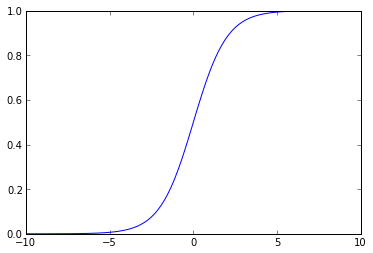

In [11]:
u=linspace(-10,10,100)
g = np.exp(u)/(1 + exp(u))
plt.plot(u,g)

La función sigmoide es derivable: $$\frac{\partial f(u)}{\partial w_i} = f(u)(1-f(u))\frac{\partial u}{\partial w_i}$$.

También es posible usar la función tangente hiperbólica:

$$f(u) = \frac{\exp(u) - \exp(-u)}{\exp(u) + \exp(-u)}$$

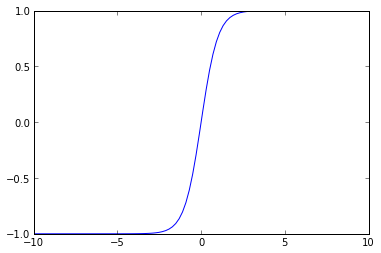

In [12]:
g = (np.exp(u) - np.exp(-u))/(np.exp(u) + np.exp(-u))
plt.plot(u,g)

Si se observa con detenimiento veremos que el rango de valores que toma la función sigmoide está en el intervalo $[0,1]$, mientras que la tangente hiperbólica está entre $[-1,1]\;$. A las funciones de salida de los perceptrones se les conoce como <b> funciones de activación</b>.

Utilizar funciones de activación nolineales, también permite que las fronteras de decisión no estén restringidas a rectas, permitiendo la definición de fronteras cada vez más complejas. Una red neuronal artificial es entonces un modelo que utiliza varias neuronas interconectadas y que puede a partir de ellas resolver problemas complejos como el mostrado en la siguiente figura.

![alt text](./Images/RNA.png "RNA")

Como podemos observar en la figura, una Red Neuronal Artificial (RNA) tiene tres tipos de capas:

<li>La capa de entrada la cual recibe las características o variables de las muestras a ser evaluadas.  </li>
<li>La o las capas ocultas son capas de perceptrones que permiten llevar a cabo la definición de fronteras complejas, como en el caso de la función XOR, en la cual se tenía una capa oculta con 2 perceptrones que llevaban a cabo funciones AND .</li>
<li>La capa de salida en la que se encuentran los perceptrones que proporcionan la salida final de la red. Una RNA puede tener varias salidas, que pueden ser usadas en problemas de clasificación multi-clase, o en problemas de regresión en los que existen varias variables a predecir.</li>

----------------------------------------------------------------------------------------------------------------------------------------------

### Algoritmo Backpropagation

El algoritmo Backpropagation ajusta (aprende) los pesos de una red multicapa, dada una estructura de red con un conjunto fijo de unidades e interconexiones.

El criterio de entrenamiento puede ser ajustado al tipo de problema e incluso pueden usarse diferentes criterios para problemas similares. Para explicar el principio de funcionamiento del algoritmo usaremos como criterio la minimización del error cuadrático medio entre las salidas de la red y los valores deseados (objetivos) para dichas salidas. El algoritmo utiliza un técnica de gradiente descendente para llevar a cabo el entrenamiento de la red.

La principal diferencia en el caso de redes multicapa es que la función de error, utilizada como criterio para el entrenamiento, puede tener múltiples mínimos locales a diferencia de un solo perceptrón en el cual existe un sólo mínimo. Esto significa que desafortunadamente no se puede garantizar la convergencia a un mínimo global.

Los perceptrones multicapa (<b>MultiLayer Perceptrón - MLP</b>) son por definición redes neuronales de propagación hacia adelante ya que la activación de las neuronas se hace desde la entrada (lugar donde se conectan las variables) hacia las neuronas de salida las cuales entregan la predicción deseada.

![alt text](./Images/RNA2.png "RNA")

Para poder describir el algoritmo Backpropagation es necesario ponernos de acuerdo en la notación utilizada:

<li> La capa de entrada tendrá tantos nodos como variables (atributos o características), que notaremos $d$.</li>
<li> Un nodo es una entrada a la red o una salida de alguna unidad en la red.</li>
<li> Cada nodo tendrá un sub-índice que indicará la posición del nodo en la capa y un super-índice que indicará la capa a la cual pertence el nodo. $x_{ji}$ denota la entrada a partir del nodo $i$ a la unidad $j$, y $w_{ji}^{(1)}$ denota el correspondiente peso, el cual corresponde a la capa 1.</li>
<li> El número de neuronas o unidades en cada capa es diferente y se denotará por $M_k$, donde $k$ hace referencia a la capa.</li>

De acuerdo a la notación anterior, en la primera capa oculta se construyen $M_1$ combinaciones lineales de las variables de entrada ${\bf{x}}=\{x_1,x_2,...,x_d\;\;\;\}$ de la forma:
 
$$
 a_j = \sum_{i=0}^{d} w_{ji}^{(1)} x_i
$$
  
donde $j=1,...,M_1\;\;$ y el superíndice $(1)$ indica que los parámetros corresponden a la primera "capa" oculta de la red. Las activaciones $a_j$ luego se transforman usando una función de activación $h(\cdot)\;\;$ no lineal para dar:
  
$$
 z_j = h(a_j)
$$


Estos valores se combinan linealmente de nuevo para dar unidades de activación en otras capas ocultas o de salida

$$
a_k = \sum_{j=0}^{M_1} w_{kj}^{(2)} z_j
$$

donde $k=1,...,M_2\;\;\;$. Si la red sólo tiene una capa oculta, $M_2\;\;$ será el número total de salidas.

La diferencia fundamental entre una RNA entrenada para resolver un problema de regresión o un problema de clasificación, está en la función de activación de la capa de salida:

<li> Regresión: $y_k = a_k$ </li>
<li> Clasificación: $y_k = \sigma(a_k)$ En problemas de clasificación de más de dos clases se utiliza comúnmente la función de activación softmax. <b>Consultar en qué consiste.</b></li>

Combinando todas estas etapas se obtiene

$$
y_k({\bf{x}},{\bf{w}}) = \sigma\left( \sum_{j=1}^{M_1} w_{kj}^{(2)} h \left( \sum_{i=1}^{d} w_{ji}^{(1)} x_i + w_{j0}^{(1)} \right) + w_{k0}^{(2)}\right) 
$$

En la ecuación anterior, todos los parámetros se agrupan en el vector ${\bf{w}}$. El modelo de red neuronal es una función no lineal de un conjunto de variables de entrada $\{x_i\}$ a un conjunto de variables de salida $\{y_k\}$ controlado por el vector de parámetros ajustables  ${\bf{w}}$.

El problema principal consiste entonces en encontrar valores adecuados para los parámetros de la red dado un conjunto de datos de entrenamiento. Es en este punto en el que necesitamos definir el algoritmo <b>Backpropagation</b>.

Como ya sabemos, la regla de actualización a partir del algoritmo de gradiente descendente está dada por:

$$
{\bf{w}}{(\tau + 1)} = {\bf{w}}{(\tau)} - \eta \nabla E({\bf{w}}{(\tau)})
$$

$\tau$ denota la iteración del algoritmo.

La función de error está dada por:

$$
E({\bf{w}})=\frac{1}{N}\sum_{n=1}^{N}E_n({\bf{w}})
$$

Esta aproximación hace parte de las técnicas que usan todo el conjunto de entrenamiento simultánemente es decir, calculan el error como la suma de los errores individuales por cada muestra, y se conocen como métodos <mark>Batch</mark> (lote).

Si por el contrario la medida de error se calcula para cada muestra de entrenamiento y posteriormente se actualizan los pesos de la red, el algoritmo se conoce como <mark>On-Line</mark> y la regla de actualización está dada por:

$$
{\bf{w}}{(\tau + 1)} = {\bf{w}}{(\tau)} - \eta \nabla E_n({\bf{w}}{(\tau)})
$$

Cuando se usa la regla de actualización on-line, se suele hablar de <i>gradiente descendente secuencial</i> o <i>gradiente descendente estocástico</i>, ya que las actualizaciones se realizan con una sola muestra a la vez, y las muestras son evaluadas de manera aleatoria por varias razones. En primer lugar para evitar que el algoritmo presente problemas de convergencia si por ejemplo estamos resolviendo un problema de clasificación y las muestras están ordenadas por clase; podría suceder que el algoritmo ajuste la frontera de decisión para reducir el error en la primera clase sacrificando muchas muestras de la segunda clase. Posteriormente cuando comience a evaluar las muestras de la segunda clase moverá la frontera para reducir el error en éstas sin tener en cuenta el error en la primera clase. De esta manera podría permanecer en un círculo vicioso que evitaría la convergencia del algoritmo.

Otra razón para el uso de muestras aleatorias en el gradiente descendente estocástico, es debido al hecho de que en problemas en los que el número de muestras es muy grande, no se utilizan todas las muestras en cada época de la red neuronal, sino que se usa un subconjunto de ellas.

Actualmente se usa el concepto de <b>minibatch</b> para definir un entrenamiento en el que se el error es acumulado en subconjunto de muestras y con base en él se actualizan los pesos de la red. Es por lo tanto un punto intermedio entre el entrenamiento tipo batch y el on-line.

El principal problema con el entrenamiento de una red neuronal es que para calcular el error en cada capa es necesario conocer la salida deseada, y en el caso de las capas ocultas la salida deseada es desconocida, precisamente por esa razón reciben su nombre.

El algoritmo Backpropagation es entonces una forma eficiente de evaluar el gradiente de la función de error $E({\bf{w}})$.

El algoritmo se realiza en dos etapas:

<li> Primera etapa: Evaluación de las derivadas de la función de error con respecto a los pesos. </li>
<li> Segunda etapa: Las derivadas se emplean para realizar los ajustes de los pesos. </li>

### Primera etapa

Lo primero que debe hacer para poder llevar a cabo el entrenamiento es presentarle a la red el vector de entrada (muestra) y calcular las activaciones de las correspondientes unidades ocultas y de salida. Este proceso se conoce como propagación hacia adelante. En general en la red hacia adelante cada unidad calcula una suma ponderada de sus entradas

$$
a_j = \sum_i w_{ji}z_i
$$

que se transforma mediante una función de activación

$$
z_j = h(a_j)
$$

Con los valores de salida obtenidos a partir de propagar la red hacia adelante, se puede calcular el error.


Teniendo en cuenta la función de error 

$$
 E({\bf{w}})=\sum_{n=1}^{N}E_n({\bf{w}})
$$
 
la derivada de la función de error requiere resolver el problema de evaluar  $\nabla E_n({\bf{w}})$.

Consideremos el modelo lineal simple en el que las salidas $y_k$ son combinaciones lineales de las variables de entrada

$$
y_k=\sum_i w_{ki}x_i
$$

con una función de error

$$
E_n = \frac{1}{2}\sum_k(y_{nk} - t_{nk})^2
$$

donde $y _{nk} = y_k({\bf{x}}_n,{\bf{w}})\;\;\;$ y $t _{nk}\;\;\;$ es la salida deseada. <b>Note</b> que estamos considerando un modelo que tiene $k$ salidas, razón por la cual el error de una muestra ${\bf{x}}_n$, corresponde a la suma de los errores proporcionados por cada salida de la red para dicha muestra.  El gradiente de esta función con respecto a $w _{ji}$ está dado como: 

$$
\frac{\partial E_n}{\partial w_{ij}} = \left( y_{nj} - t_{nj} \right) x_{ni} 
$$

que puede interpretarse como un cálculo local que incluye el producto del error $y_{nj} - t_{nj}\;\;\;$ asociada a la salida del enlace $w_{ji}$ y la variable $x_{ni}$ asociada con la entrada de ese enlace.

Si se considera la evaluación de $E_n$ con respecto a un peso $w_{ji}$

$$
\frac{\partial E_n}{\partial w_{ji}} = \frac{\partial E_n}{\partial a_j} \frac{\partial a_j}{\partial w_{ji}}  
$$

Se utiliza la notación 

$$
\delta_j = \frac{\partial E_n}{\partial a_j} 
$$

donde los $\delta$'s se conocen como errores. Igualmente

$$
\frac{\partial a_j}{\partial w_{ji}} = z_i 
$$

Haciendo las sustituciones anteriores se obtiene

$$
\frac{\partial E_n}{\partial w_{ji}} = \delta_j z_i
$$

La ecuación anterior indica que la derivada requerida se obtiene multiplicando el valor de $\delta$ de la unidad en el lado de salida del peso, por el valor de $z$ para la unidad en el lado de la entrada del peso.

Como se ha visto, para las unidades de salida se tiene

$$
\delta_k = y_k - t_k
$$

mientras que para evaluar los $\delta$'s para los nodos ocultos, se emplea la regla de la cadena para derivadas parciales

$$
\delta_j \equiv \frac{\partial E_n}{\partial a_j}  = \sum_k \frac{\partial E_n}{\partial a_k} \frac{\partial a_k}{\partial a_j}  
$$

la cual evalúa todos los nodos $k$ a los cuales la unidad $j$ envía una conexión.

Haciendo las sustituciones adecuadas

$$
\delta_j = \dot{h}(a_j)\sum_k w_{kj}\delta_k
$$

que expresa que el valor de $\delta$ para una unidad escondida en particular puede obtenerse propagando los $\delta$'s hacia atrás desde unidades más altas (más cercanas a la salida) en la red. El procedimiento de propagación hacia atrás se puede resumir como:

<li> Aplicar un vector de entrada ${\bf{x}}_n$ a la red y propagarlo hacia adelante. </li>
<li> Evaluar todos los $\delta_k$ para las unidades de salida. </li>
<li> Propagar los $\delta$'s del paso anterior para obtener los $\delta_j$ de cada nodo oculto en la red. </li>
<li> Usar $\partial E_n/ w_{ji} = \delta_j z_i \;\;$ para evaluar las derivadas requeridas. </li>

Para los métodos basados en entrenamiento por lotes, la derivada del error se calcula como:

$$
\frac{\partial E}{\partial w_{ji}} = \sum_n \frac{\partial E_n}{\partial w_{ji}}
$$

Todo el algoritmo de entrenamiento puede ser usado para múltiples capas ocultas y múltiples salidas. Tanto en problemas de regresión como en problemas de clasificación, cuya única diferencia desde el punto de vista del entrenamiento será el cálculo de los $\delta$'s para la capa de salida.

Ej: Uso de la librería neurolab

(1500, 2)


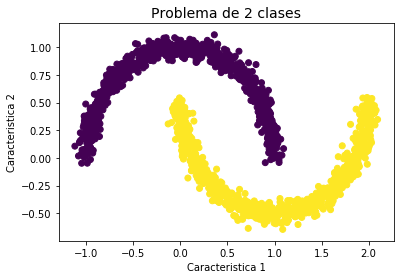

In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
print(X.shape)
plt.title('Problema de 2 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.scatter(X[:,0], X[:,1], c=y);

Epoch: 15; Error: 0.48249993074701175;
The goal of learning is reached


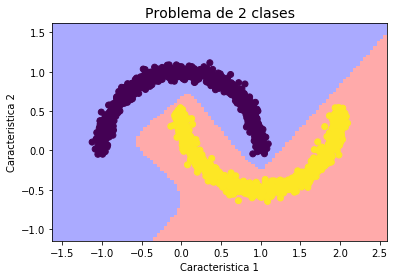

In [2]:
import numpy as np
import neurolab as nl
from matplotlib.colors import ListedColormap
# Create train samples
input = X
target = np.array(y)[np.newaxis]
target = target.T
# Create network with 2 inputs, 5 neurons in input layer and 1 in output layer
net = nl.net.newff([[X.min(), X.max()], [y.min(), y.max()]], [5, 1],  [nl.trans.LogSig(),nl.trans.LogSig()])
# Train process
err = net.train(input, target, show=15)
# Test
cmap_light = ListedColormap(['#AAAAFF','#AAFFAA','#FFAAAA',])
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        #print([xx[1,i],yy[j,1]])
        Z[i,j]=net.sim([[xx[1,i],yy[j,1]]])
Z = np.round(Z)
plt.title('Problema de 2 clases', fontsize=14)
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.pcolormesh(xx, yy, Z.T, cmap=cmap_light)
plt.scatter(X[:,0], X[:,1], c=y);

## Batch, Minibatch and online learning

Durante el entrenamiento de un MLP las siguientes cantidades deben ser estimadas en cada iteración:

<img src="Images/ForwardBackward.png" alt="FBI" width="500"/>

El entrenamiento que acumula todos los errores cometidos a partir de todas las meutras de entrenamiento antes de llevar a cabo la actualización de los pesos se conoce como **Batch training**. Desafortunadamente si el número de muestras es muy grande, el algoritmo presenta problemas de computo no sólo por la cantidad de cálculos sino de memoria necesaria para realizar la multiplicación de matrices. Pero el problema más significativo es que la trayectoria del gradiente Batch tiende a estancarse en puntos silla (**saddle point**) de la función de costo.

Como alternativa el entrenamiento se puede realizar propagando una sola muestra hacia adelante y realizando la actualización de los pesos a partir del error que se comete con esa muestra. Los dos pasos son repetidos para todas las muestras de entrenamiento. Esta estrategia es llamada **on-line learning** y el algoritmo resultante es llamado **Stochastic Gradient Descent (SGD)**. Debido a que el algoritmo usa una muestra aleatoria a la vez, la convergencia al óptimo es más ruidosa, pero eso ayuda al algoritmo a escapar de óptimos locales y puntos silla.

<img src="Images/SGD_MB.png" alt="SGD" width="600"/>

Uno de los problemas del algoritmo SGD es que requiere muchas iteraciones para converger. Por consiguiente una solución intermedia, llamada **Mini-batch gradient descent**, parte las muestras de entrenamiento en mini-batchs, y se realiza los pasos forward y backward por cada mini-batch.

1 ok
2 ok
3 ok


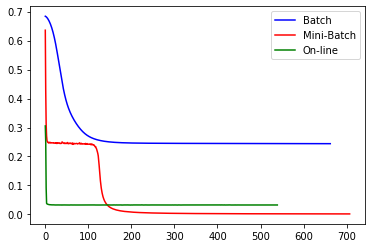

In [3]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change = 500, max_iter=2000)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 0.1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()

1 ok
2 ok
3 ok


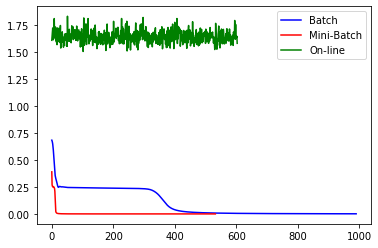

In [4]:
clf1 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1500, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change = 500, max_iter=2000)
clf1.fit(X, y)
print ("1 ok")
clf2 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=50, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf2.fit(X, y)
print ("2 ok")
clf3 = MLPClassifier(activation='logistic',solver='sgd', learning_rate_init = 1, learning_rate = 'constant', batch_size=1, hidden_layer_sizes=(5,), random_state=1,n_iter_no_change =500, max_iter=2000)
clf3.fit(X, y)
print ("3 ok")
plt.plot(clf1.loss_curve_,color='b',label='Batch')
plt.plot(clf2.loss_curve_,color='r',label='Mini-Batch')
plt.plot(clf3.loss_curve_,color='g',label='On-line')
plt.legend()

## Desventajas de las aproximaciones clásicas

**Falta de flexibilidad**

* Las aproximaciones clásicas requieren una formulación completa si se desea cambiar la función de costo o evaluar una arquitectura ligeramente diferente.
* Una nueva arquitectura requiere el cálculo de todas las formulas de re-estimación de los parámetros y no saca ventaja de herramientas de cálculo simbólico.
* Algunos frameworks clasicos soportan regularización, pero no incluyen los avances más recientes a este respecto.
* Hay nuevas funciones de activación que evitan problemas con el desvanecimiento del gradiente cuando el número de capas es grande.
* Los frameworks clasicos no usan paralelismo.
* Los frameworks clásicos no permiten el uso de estrategias más avanzadas de entrenamiento como el Transfer learning

[1] Simon Haykin, Neural Networks and Learning Machines, 3ra Edición, Prentice Hall, USA, 2009.